<a href="https://colab.research.google.com/github/melius30/CE_200A_project/blob/main/Problem_set_9_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE200A: Environmental Fluid Mechanics
## Problem Set 9 (Group Project)
*Course Professor: Tina Chow (tinakc@berkeley.edu) (CEE, UC Berkeley)
#Group 1 members
1) Md Elius

2) Sreedurga Cherukumalli

3) Jon Gallardo

4) Grace Chen

## Project Overview
Your engineering team is hired to create a computer model for the optimal disposal of organic waste in a vertically-mixed surface water channel. The model should account for dissolved oxygen (DO) and biological oxygen demand (BOD). Your simulation should be based on the depth-averaged (two-dimensional) equations for advection, diffusion, and chemical reaction. The 2D scalar equations to solve are the extended Streeter-Phelps equations:

### Governing Equations

$$
\frac{\partial B}{\partial t} + u \frac{\partial B}{\partial x} + v \frac{\partial B}{\partial y} = D_x \frac{\partial^2 B}{\partial x^2} + D_y \frac{\partial^2 B}{\partial y^2} - K_r B + \delta(x - x_0, y - y_0) Q_B
$$

$$
\frac{\partial O}{\partial t} + u \frac{\partial O}{\partial x} + v \frac{\partial O}{\partial y} = D_x \frac{\partial^2 O}{\partial x^2} + D_y \frac{\partial^2 O}{\partial y^2} - K_d B + K_a (O_{sat} - O)
$$

where:
- \( B \): concentration of BOD
- \( O \): concentration of DO
- \( O_{sat} \): saturation level of oxygen (8 mg/L)
- \( u \): velocity in the x-direction (set to 0.4 m/s)
- \( v \): velocity in the y-direction (set to 0 m/s)
- \( D_x, D_y \): dispersion coefficients in x and y directions (set to 0.5 m\(^2\)/s)
- \( K_r \): BOD decay coefficient (set to 0.01 s\(^{-1}\))
- \( K_d \): DO utilization coefficient (set to 0.01 s\(^{-1}\))
- \( K_a \): re-aeration coefficient (set to 0.02 s\(^{-1}\))
- \( Q_B \): load strength of BOD source (set to 70 g/s/m, steady input)

**Initial Conditions:**
- \( B(x, y, 0) = 0 \)
- \( O(x, y, 0) = O_{sat} \)

**Boundary Conditions:**
1. **Inflow (x=0)**:
   $$
   B(0, y, t) = 0, \quad O(0, y, t) = O_{sat}
   $$
2. **Outflow (x=L)** (where \(L = 150\) m):
   $$
   \frac{\partial B}{\partial x} \bigg|_{(L, y, t)} = 0, \quad \frac{\partial O}{\partial x} \bigg|_{(L, y, t)} = 0
   $$
3. **Solid Boundaries (y=0 and y=W)** (where \(W = 30\) m):
   $$
   \frac{\partial C}{\partial y} \bigg|_{(x, 0, t)} = 0, \quad \frac{\partial C}{\partial y} \bigg|_{(x, W, t)} = 0
   $$


1. Write the discretized equations using explicit first order time stepping and second order central differences in space for simplicity. Use ghost points to implement the boundary conditions. Sketch the domain and the grid so you know how to number all your points including ghost points.


# Solution: Discretized BOD and DO Equations

## 1. Discretized BOD Equation

# Defining the Grid and Parameters

- **Length** \( L = 150 m\)
- **Width** \( W = 30 m\)
-**Spatial step sizes**:

$$
 \Delta x \ and \Delta y\
$$

## Initial Conditions

- \( B(x, y, 0) = 0 \)
- \( O(x, y, 0) = O_{sat} = 8 mg/L\)

## Boundary Conditions

Apply appropriate boundary conditions for inflow, outflow, and solid boundaries as given in the problem statement.

---

# Discretizing the Equations (Central Differences for Space)

For each point \( (i, j) \) in the grid:

### Time Derivative for BOD

The time derivative is approximated as:

$$
\frac{\partial B}{\partial t} \approx \frac{B_{i,j}^{n+1} - B_{i,j}^n}{\Delta t}
$$

### Advection Terms

1. **In the \( x \)-direction**:

   $$
   \frac{\partial B}{\partial x} \approx \frac{B_{i+1, j}^n - B_{i-1, j}^n}{2 \Delta x}
   $$

2. **In the \( y \)-direction**:

   $$
   \frac{\partial B}{\partial y} \approx \frac{B_{i, j+1}^n - B_{i, j-1}^n}{2 \Delta y}
   $$

### Diffusion Terms

1. **In the \( x \)-direction**:

   $$
   \frac{\partial^2 B}{\partial x^2} \approx \frac{B_{i+1, j}^n - 2 B_{i,j}^n + B_{i-1, j}^n}{(\Delta x)^2}
   $$

2. **In the \( y \)-direction**:

   $$
   \frac{\partial^2 B}{\partial y^2} \approx \frac{B_{i, j+1}^n - 2 B_{i,j}^n + B_{i, j-1}^n}{(\Delta y)^2}
   $$



## 1. Discretized BO Equation

$$
\frac{\partial B}{\partial t} + u \frac{\partial B}{\partial x} + v \frac{\partial B}{\partial y} = D_x \frac{\partial^2 B}{\partial x^2} + D_y \frac{\partial^2 B}{\partial y^2} - K_r B + \delta(x - x_0, y - y_0) Q_B
$$

For explicit time stepping and second-order central differences, this becomes:

$$
B_{i,j}^{n+1} = B_{i,j}^n + \Delta t \left[ -u \frac{B_{i+1,j}^n - B_{i-1,j}^n}{2 \Delta x} - v \frac{B_{i,j+1}^n - B_{i,j-1}^n}{2 \Delta y} \right.
$$

$$
\left. + D_x \frac{B_{i+1,j}^n - 2B_{i,j}^n + B_{i-1,j}^n}{(\Delta x)^2} + D_y \frac{B_{i,j+1}^n - 2B_{i,j}^n + B_{i,j-1}^n}{(\Delta y)^2} - K_r B_{i,j}^n + \frac{Q_B(i, j)}{\Delta x \cdot \Delta y} \right]
$$

## 2. Discretized DO Equation

The DO equation is:

$$
\frac{\partial O}{\partial t} + u \frac{\partial O}{\partial x} + v \frac{\partial O}{\partial y} = D_x \frac{\partial^2 O}{\partial x^2} + D_y \frac{\partial^2 O}{\partial y^2} - K_d B + K_a (O_{sat} - O)
$$

In discretized form, this equation becomes:

$$
O_{i,j}^{n+1} = O_{i,j}^n + \Delta t \left[ -u \frac{O_{i+1,j}^n - O_{i-1,j}^n}{2 \Delta x} - v \frac{O_{i,j+1}^n - O_{i,j-1}^n}{2 \Delta y} \right.
$$

$$
\left. + D_x \frac{O_{i+1,j}^n - 2O_{i,j}^n + O_{i-1,j}^n}{(\Delta x)^2} + D_y \frac{O_{i,j+1}^n - 2O_{i,j}^n + O_{i,j-1}^n}{(\Delta y)^2} - K_d B_{i,j}^n + K_a (O_{sat} - O_{i,j}^n) \right]
$$




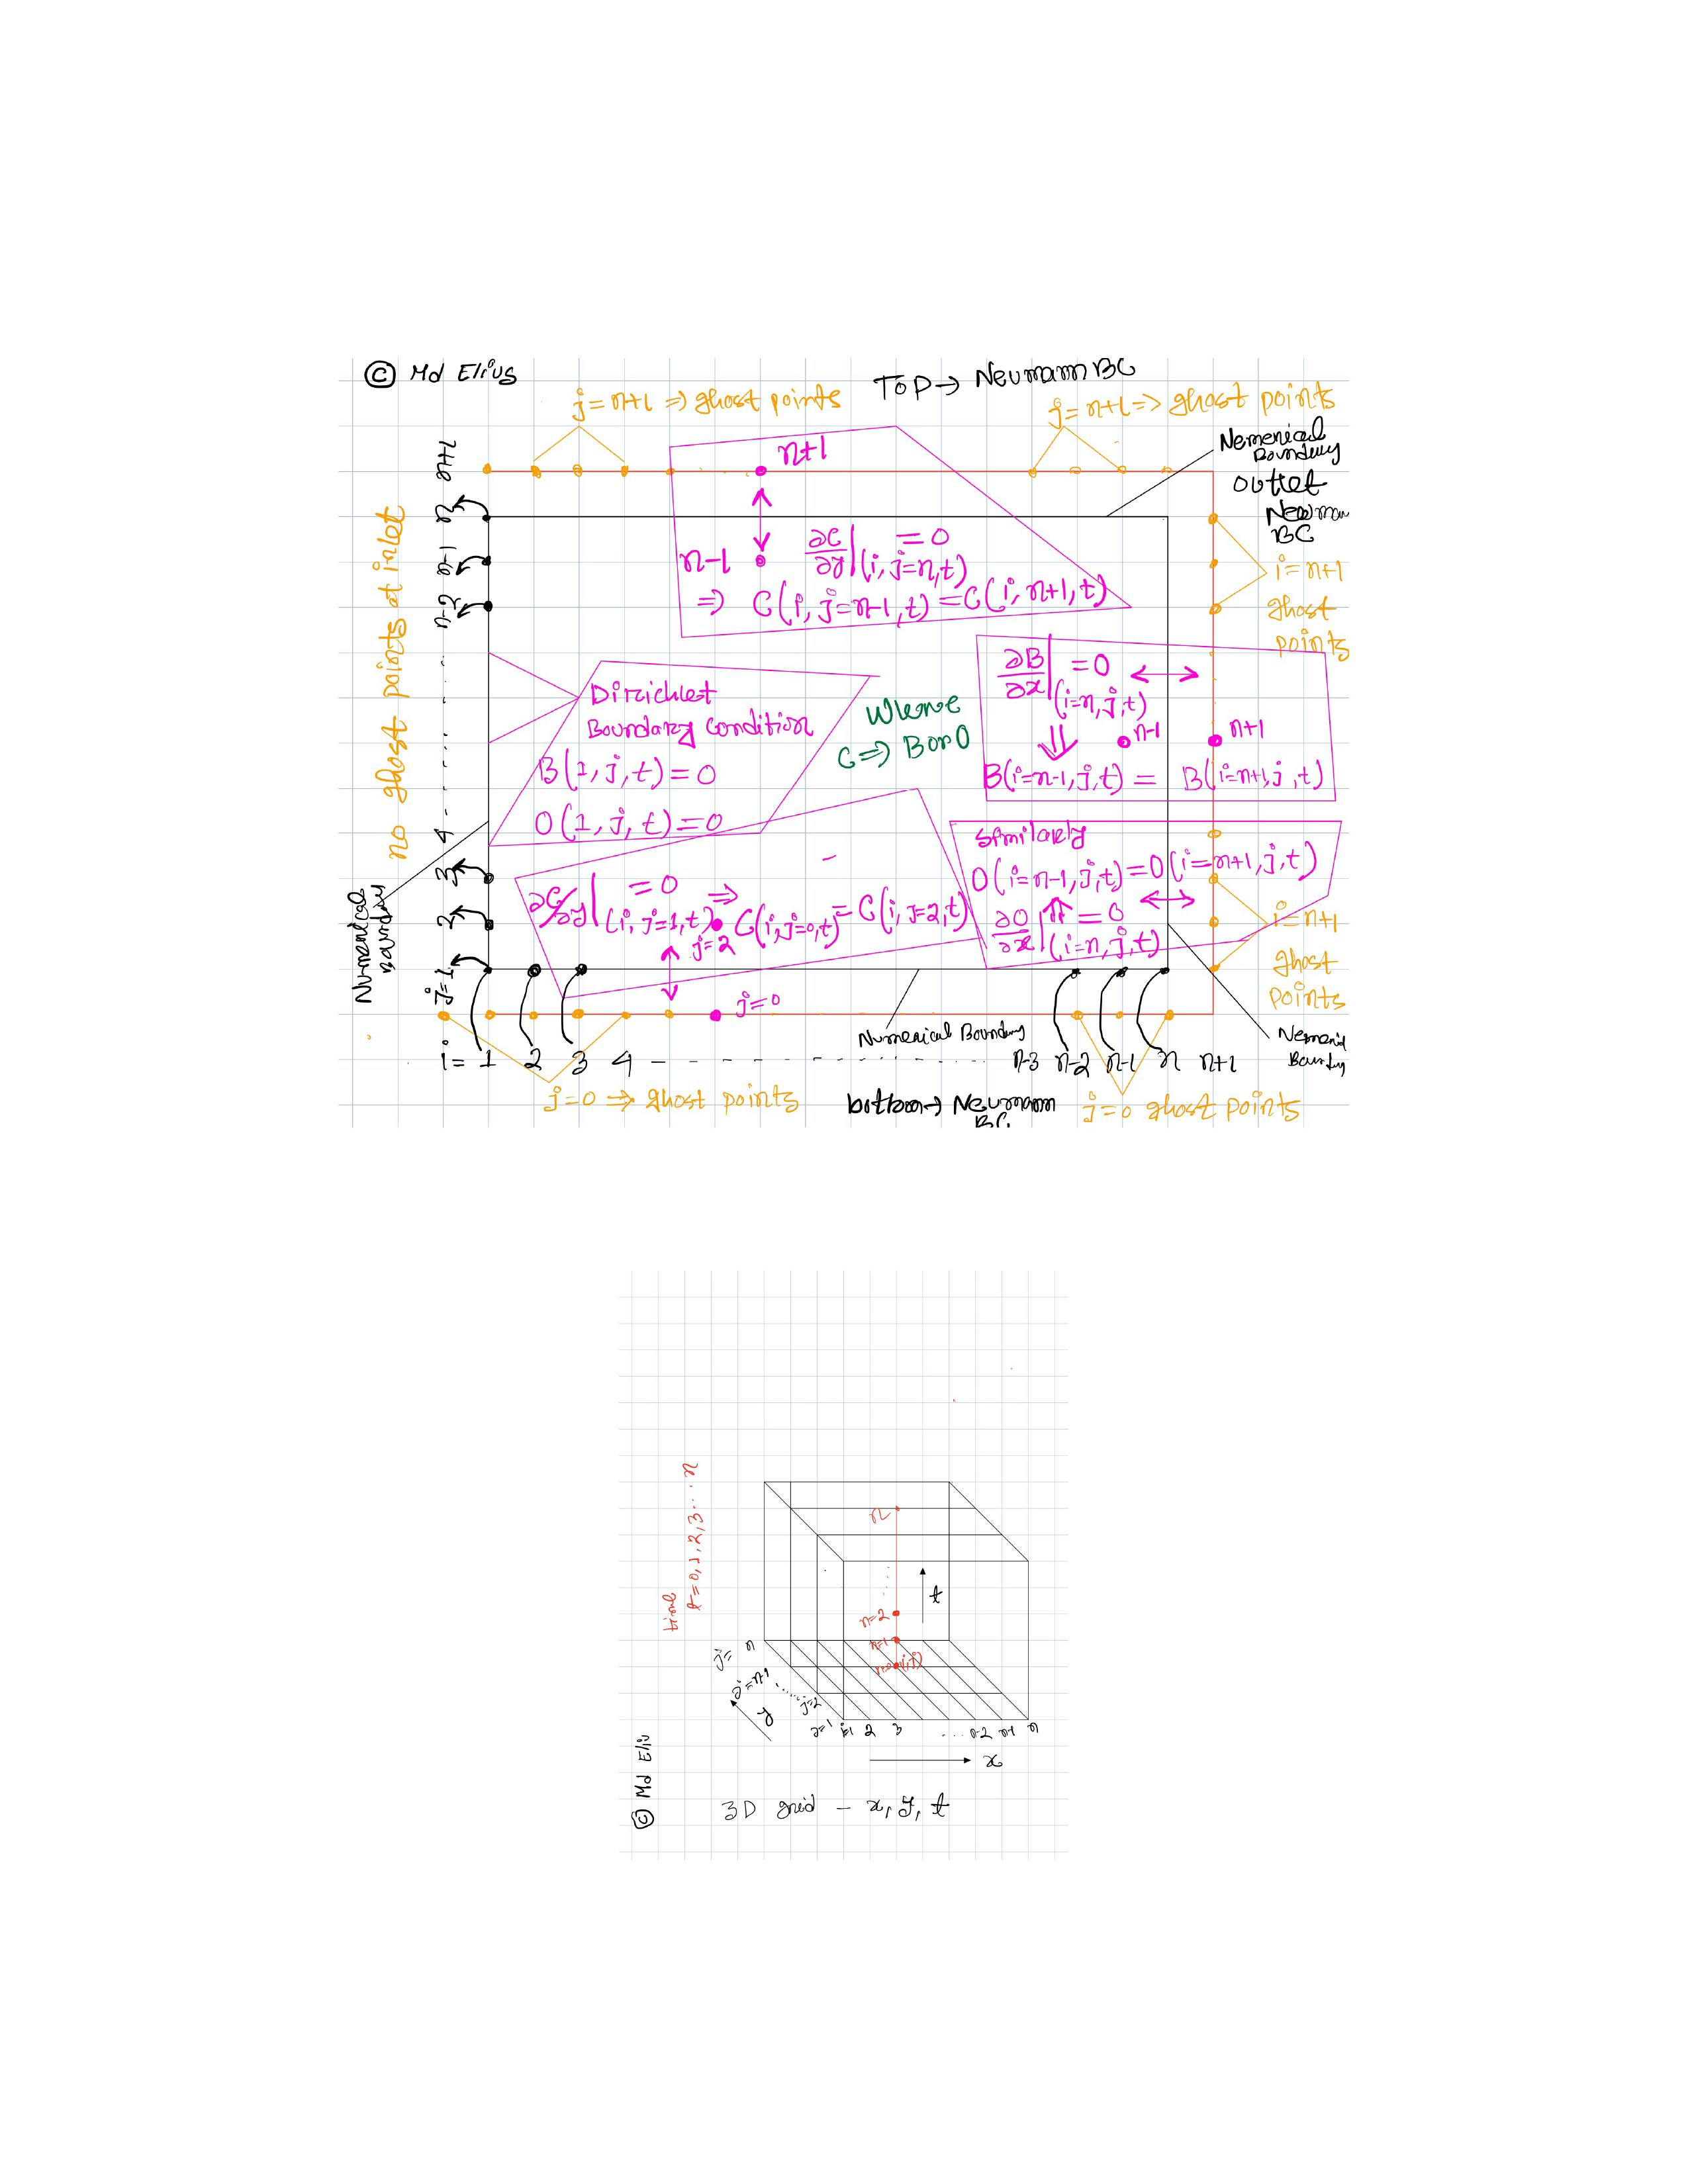

Before running the code, perform a von Neumann stability analysis for the  - diffusion equation to determine what parameters you must choose to guarantee a stable numerical solution. See the handout for an example of how to do this in 2D. You can ignore the reactive and source terms in this analysis and set ∆x = ∆y and u = v and the x and y wavenumbers equal at the end when you are trying to simplify the expressions. Also determine the cell Peclet number limit for the 2D equation (this can be done like in 1D by dividing your equation by r and regrouping coefficients to be in terms of P)

%%markdown

**BOD equation:**

$$
\frac{B_{i,j}^{n+1} - B_{i,j}^n}{\Delta t} + u \left[ \frac{B_{i+1,j}^{n} - B_{i-1,j}^{n}}{2 \Delta x} \right] + v \left[ \frac{B_{i,j+1}^{n} - B_{i,j-1}^{n}}{2 \Delta y} \right] = D_x \frac{B_{i+1,j}^{n} - 2B_{i,j}^{n} + B_{i-1,j}^{n}}{\Delta x^2} + D_y \frac{B_{i,j+1}^{n} - 2B_{i,j}^{n} + B_{i,j-1}^{n}}{\Delta y^2}
$$



Ignoring source and reactive term



---

**assume a solution of the form**



$$
B_{l,j}^n = \xi^n e^{i k_x x_l} e^{i k_y y_j}
$$

---

$$
\xi^{n+1} = \xi^{n} - \xi^{n}\frac{u \Delta t}{2 \Delta x} (e^{i k_x \Delta x} - e^{-i k_x \Delta x}) - \xi^{n}\frac{v \Delta t}{2 \Delta y} (e^{i k_y \Delta y} - e^{-i k_y \Delta y}) + \xi^{n}\frac{D_x \Delta t}{\Delta x^2} (e^{i k_x \Delta x} + e^{-i k_x \Delta x} - 2) + \xi^{n}\frac{D_y \Delta t}{\Delta y^2} (e^{i k_y \Delta y} + e^{-i k_y \Delta y} - 2)
$$

---


$$
\xi = 1 - \frac{u \Delta t}{2 \Delta x} (e^{i k_x \Delta x} - e^{-i k_x \Delta x}) - \frac{v \Delta t}{2 \Delta y} (e^{i k_y \Delta y} - e^{-i k_y \Delta y}) + \frac{D_x \Delta t}{\Delta x^2} (e^{i k_x \Delta x} + e^{-i k_x \Delta x} - 2) + \frac{D_y \Delta t}{\Delta y^2} (e^{i k_y \Delta y} + e^{-i k_y \Delta y} - 2)
$$

Using Euler’s Identity:

$$
\xi = 1 - i \frac{u \Delta t}{\Delta x} (2 \sin(k_x \Delta x)) + \frac{D_x \Delta t}{\Delta x^2} (2 \cos(k_x \Delta x) - 2)
$$

Rewriting:

$$
\xi = 1 + 4r (\cos(k_x \Delta x) - 1) - (2 C_r \sin(k_x \Delta x)) i
$$

---

With:

$$
r = \frac{D_x \Delta t}{\Delta x^2}
$$

$$
C_r = \frac{u \Delta t}{\Delta x}
$$

---

If \( k_x \Delta x = \pi \):


$$
1 - 8r \leq 1
$$

$$
-1 - 8r \leq 0
$$

$$
8r \geq 0 \Rightarrow r \geq \frac{1}{4}
$$

If \( k_x \Delta x = 0 \):

Assume \( \sin(k_x \Delta x) = 0 \).


Then:

$$
\| \xi \| = \left[ 1 - 8r \sin^2\left(\frac{k_x \Delta x}{2}\right) \right]^2 + [2 C_r \sin(k_x \Delta x)]^2 \leq 1
$$


---

Let:

$$
-8r \left( \frac{k_x \Delta x}{2} \right)^2 + 4 (C_r)^2 \leq 1
$$

Continuing:

$$
1 - 16r \left( \frac{k_x \Delta x}{2} \right)^2 + 4r \left( \frac{k_x \Delta x}{2} \right)^4 + 4(C_r)^2 \left( \frac{k_x \Delta x}{2} \right)^2 \leq 1
$$

If \( k_x \Delta x = 0 \), then:

$$
1 - 4r \left( \frac{k_x \Delta x}{2} \right)^2 + (C_r \cdot k_x)^2 \leq 1
$$

Simplifying further:

$$
1 - (4r - 4(C_r)^2) (k_x)^2 \leq 1
$$

This implies:

$$
r \geq (C_r)^2
$$

Therefore, the stability criterion requires:

$$
\frac{1}{4} > r \geq (C_r)^2
$$

---


